# Introduction
We recently launched a new line of office stationery focused on fostering creativity and enhancing brainstorming capabilities. To optimize the sales approach for this new product line, we tested three different sales strategies: email, call, and a combination of email and call. The purpose of this analysis is to evaluate the effectiveness of these sales methods and provide insights to inform the sales strategy moving forward.

This report will detail the data validation and cleaning process, present the results of the explaratory data analysis, define a metric for the business to monitor, and provide recommendations based on the findings. By leveraging data-driven insights, we can hopefully make more informed decisions to improve sales performance and ensure the sucess of the new product line.

In [ ]:
# library Other neccessary imports

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# Data Importing and Validation

The original dataset has 15000 rows and 8 columns.
- The **week** column contains integer values from 1-6 corresponding to each week and 0 null values. No changes to this column were necessary.
- The **sales_method** column contains 5 different unique values **(Email, Call, Email + Call, em + call, email)** and 0 null values. The column should only contain 3 unique values corresponding to each type of sales method. Upon inspection of the values in this column simple mistakes such as different capitalization and use of abbrevations created two extra sets of values. Changes were made and after cleaning the column only contains the following 3 different value types corresponding to each alternate sales method: Email, Call, Email + Call
- The **customer_id** column contains unique identifiers for each customer and had no missing values. No changes to this column were required.
- The **revenue** column had 1074 missing values. I decided that the best approach to handle these missing values would be to replace them by the mean revenue corresponding to each type of sales_method.
- The **years_as_customer** column has 0 missing values, however we had 2 rows with invalid values. Since our company was founded in 1984, the maximum amount of years we could have any given customer is 39. Two rows had values with 47 and 63, which we know is not possible. I assume this was just a mistake in data entry, and I will replace these two values with 39.
- The **nb_site_visits** column has 0 missing values and all data is valid. No changes needed to be made to this column
- The **state** The column has 0 missing values and 50 unique values corresponding to each state. No changes need to be made to this column

Finally after all the data validation and cleaning I checked for any duplicate rows and found none. After cleaning and validating the data our dataset contains 15000 rows and 8 columns with 0 missing values.

In [3]:
# import data
import pandas as pd
data = pd.read_csv('product_sales.csv')
data

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


In [6]:
# print the first 10 rows of the data
data.head(10)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia
7,1,Email,047df079-071b-4380-9012-2bfe9bce45d5,10,99.94,1,22,Oklahoma
8,5,Email,771586bd-7b64-40be-87df-afe884d2af9e,11,108.34,10,31,Massachusetts
9,5,Call,56491dae-bbe7-49f0-a651-b823a01103d8,11,53.82,7,23,Missouri


In [8]:
# Determine the number of rows and columns
data.shape

(15000, 8)

In [10]:
# Present some information from the database. Use the info() 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [12]:
# and Describe()
data.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [ ]:
# Check the various sales methods to ensure there are only 3 unique values. 
# Use the value_counts() and print the result


In [14]:
data.columns

Index(['week', 'sales_method', 'customer_id', 'nb_sold', 'revenue',
       'years_as_customer', 'nb_site_visits', 'state'],
      dtype='object')

In [28]:
print("unique values before cleaning:")
print(data['sales_method'].value_counts())

unique values before cleaning:
sales_method
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64


In [37]:
# Cleaning sales_method column: standardizing values
data['sales_method'] = data['sales_method'].str.strip().str.lower().replace({
    "em + call": "email + call",
    "email": "Email",
    "call": "Call",
    "email + call": "Email + Call"
})

# Display unique values after cleaning
print("\nUnique values after cleaning:")
print(data['sales_method'].value_counts())


Unique values after cleaning:
sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64


In [43]:
# Define a mapping dictionary to correct the inconsistent values(em + call and email)
mapping = {
    "em + call": "Email + Call",
    "email": "Email",
    "call": "Call"
}

# Apply the mapping to the 'sales_method' column
data['sales_method'] = data['sales_method'].str.strip().str.title().replace(mapping)

# Check the value counts to ensure there are only 3 unique values
print(data['sales_method'].value_counts())


sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64


In [45]:
# find the Average revenue for each sales method. Print the Value
average_revenue = data.groupby('sales_method')['revenue'].mean()

# Print the result
print(average_revenue)

sales_method
Call             47.597467
Email            97.127684
Email + Call    183.651233
Name: revenue, dtype: float64


In [49]:
# The company was founded in 1984, the maximum amount of years we could have any given customer is 41.
invalid_customers = data[data['years_as_customer'] > 41]
# Are there any customers who have a year recorded thats greater than 41?
print(invalid_customers)

       week sales_method                           customer_id  nb_sold  \
13741     2        Email  18919515-a618-430c-9a05-2c7d8fea96af       10   
13800     4         Call  2ea97d34-571d-4e1b-95be-fea1c404649f       10   

       revenue  years_as_customer  nb_site_visits       state  
13741    97.22                 63              24  California  
13800    50.47                 47              27  California  


In [55]:
# Replace those customers years with 41
data.loc[data['years_as_customer'] > 41, 'years_as_customer'] = 41

# Verify the changes
print(data['years_as_customer'].max())

41


In [59]:
# check to see if replacement worked
invalid_values = data[data['years_as_customer'] > 41]

# Print the result
print(invalid_values)

# Alternatively, check the maximum value to confirm the highest is now 41
print("Max years_as_customer:", data['years_as_customer'].max())

Empty DataFrame
Columns: [week, sales_method, customer_id, nb_sold, revenue, years_as_customer, nb_site_visits, state]
Index: []
Max years_as_customer: 41


In [61]:
# check number of unique values for state
unique_states = data['state'].nunique()

# Print the result
print("Number of unique states:", unique_states)

Number of unique states: 50


In [ ]:
# check if any duplicate rows in the sales_data

In [65]:
duplicates = data[data.duplicated()]

# Print the result
print("Number of duplicate rows:", duplicates.shape[0])

Number of duplicate rows: 0


# 3. Exploratory Analysis

### A. Number of Customers for each Sales Method
Our most popular sales method during the 6 week period was via Email with a total of 7466 customers, followed by the Call method with 4962 customers and finally the Email + Call method with 2572 total customers.

In [69]:
# find number of customers for each sales method
customers_per_method = data['sales_method'].value_counts()

# Print the result
print(customers_per_method)

sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64


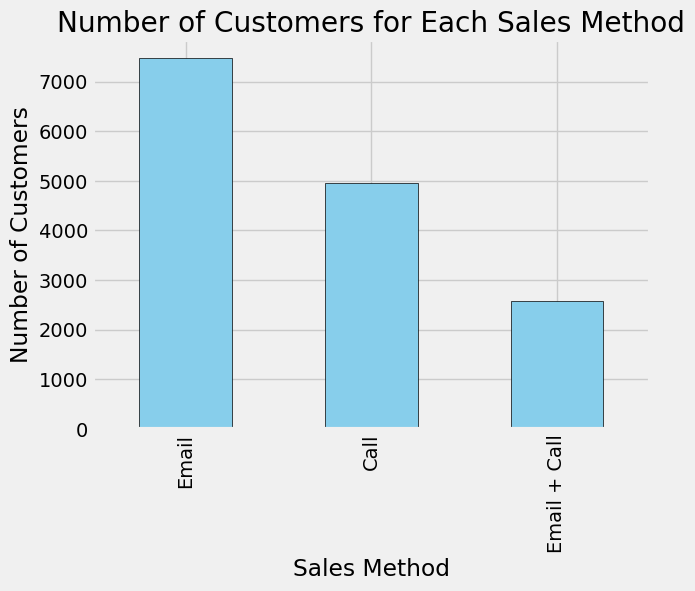

In [89]:
# plot your findings using a barplot

# Find the number of customers for each sales method
customers_per_method = data['sales_method'].value_counts()

# Plot the results using a barplot
customers_per_method.plot(kind='bar', color='skyblue', edgecolor='black')

# Add value labels to each bar
plt.title('Number of Customers for Each Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Number of Customers')

plt.show()

### B. Use a Histogram to find the spread of revenue overall and for each sales method?


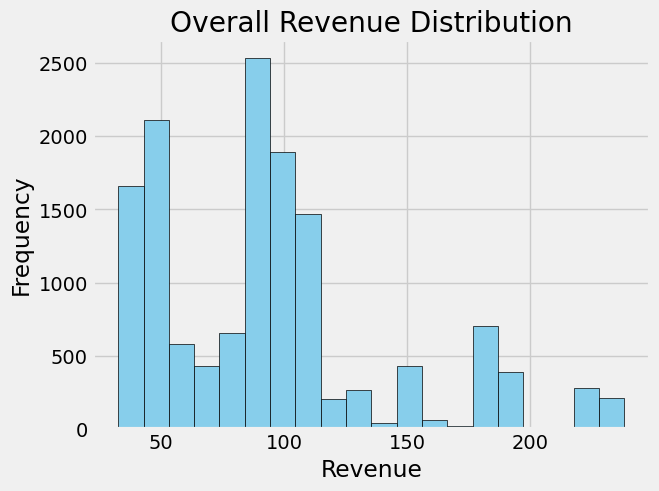

In [87]:
# Histogram for overall revenue. use the title for the plot 'Overall Revenue Distribution'

# Plot the histogram for overall revenue
data['revenue'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Overall Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')

plt.show()

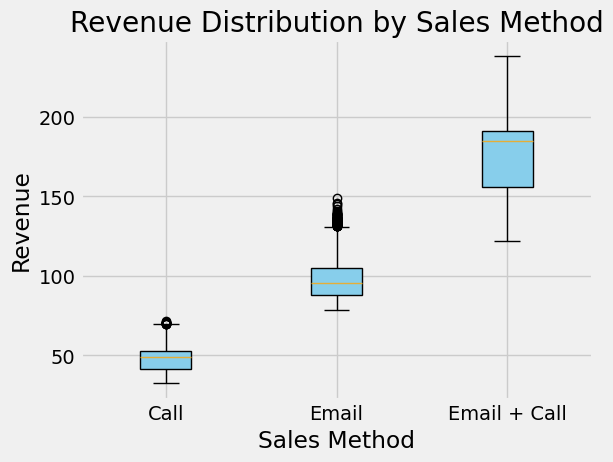

In [91]:
# Plot revenue(x axis) vs sales method(y-axis) with title Revenue Distribution by Sales Method 

# Plot Revenue vs Sales Method using a boxplot
data.boxplot(column='revenue', by='sales_method', patch_artist=True, 
           boxprops=dict(facecolor='skyblue', color='black'), 
           whiskerprops=dict(color='black'), capprops=dict(color='black'))

# Add title and labels
plt.title('Revenue Distribution by Sales Method')
plt.suptitle('')  # Removes the default title generated by the boxplot
plt.xlabel('Sales Method')
plt.ylabel('Revenue')

plt.show()

### C. determine and plot Revenue over Time For Each Sales Method(use the .sum().unstack()

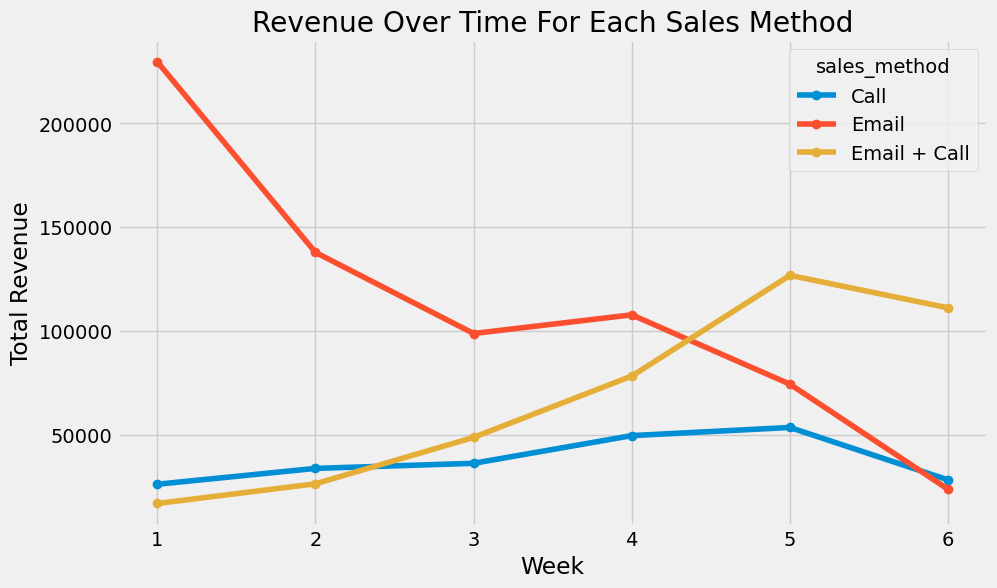

In [93]:
# Group by 'week' and 'sales_method', then sum the revenue for each combination
revenue_by_week_method = data.groupby(['week', 'sales_method'])['revenue'].sum().unstack()

# Plot the results
revenue_by_week_method.plot(kind='line', marker='o', figsize=(10,6))

# Add title and labels
plt.title('Revenue Over Time For Each Sales Method')
plt.xlabel('Week')
plt.ylabel('Total Revenue')

plt.show()

Results from Analysis! From the table above we see following:
- In week 1, the 'Email' sales method generated the highest revenue ($48,122.68), followed by 'Email + Call' (20,007.40) and 'Call' (27,015.93). However, it is important to note that the 'Email' method required the least effort from the sales team, making it the most efficient method during the first week.
- Over the course of the 6 weeks sales generated from the Email sales method consistently decreased. This decline in revenue overtime could indicate diminishing returns from the Email sales method as time goes on.
- The call method shows an overall incresing trend in revenue overtime with some fluctations. Towards the end of the 6 week period the amount of revenue generated from the Call method began to decrease.
- The Email + Call method shows a healthy increasing trend of revenue over the 6 week period. It's possible that this method would be the most beneficial in terms of long-term revenue growth compared to the two other sales methods.

In conclusion, the Email + Call sales method appears to be the most promising in terms of long-term revenue generation, although it does require more effort from the sales team. The Email method starts strong but shows a steady decline, while the Call method has an overall increasing trend but fluctuates more. It is recommended to consider the efficiency and effort required for each method while making a decision on which sales method to continue using.

In [ ]:
Print the summary revenue generated over time.

In [95]:
# Group by 'week' and 'sales_method', then sum the revenue for each combination
revenue_summary = data.groupby(['week', 'sales_method'])['revenue'].sum().unstack()

# Print the summary of revenue generated over time
print(revenue_summary)

sales_method      Call      Email  Email + Call
week                                           
1             26159.18  229765.55      16885.33
2             33792.02  137891.57      26376.23
3             36247.27   98792.14      48737.14
4             49593.99  107788.37      78296.20
5             53518.11   74373.45     126809.72
6             28252.92   23706.75     111152.07


### D. Investigating other differences between customers in each group
Looking at the charts below we can make some interesting observations:
- The number of years we've done business with customers across each sales method was more or less equal.
- The email + call sales method saw an average of 12 sales per customer compared to 10 for call and email methods. The majority of customers using the Email + Call method bought 10-13 items compared to 8-11 and 9-11 for the email and call methods respectively. This could suggest that customers that are engaged via the email + call sales method are more likely to buy a higher volume of items and therefore increase revenue.
- We can also see that customer's that were contacted via the email + call sales method had more site visits on average than the email and call methods individually. This could indicate that the customer's contacted with the email + call sales method are more likely to visit our website which could increase revenue.

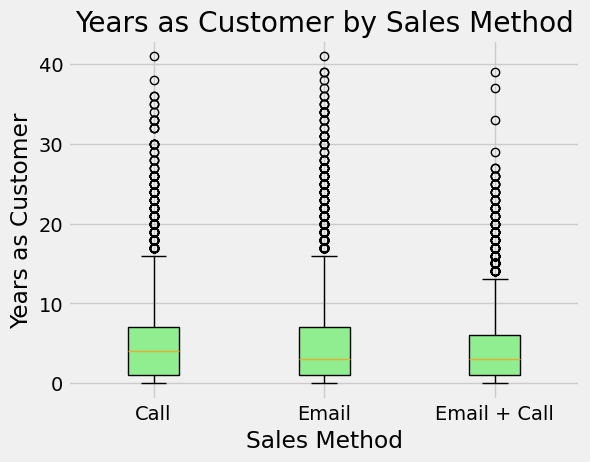

In [97]:
# Plot using a Boxplot to visualize the number of years customers have been buying from the company 
# Use (column='years_as_customer', by='sales_method')

# Plot a boxplot to visualize the number of years customers have been buying from the company
data.boxplot(column='years_as_customer', by='sales_method', patch_artist=True, 
           boxprops=dict(facecolor='lightgreen', color='black'), 
           whiskerprops=dict(color='black'), capprops=dict(color='black'))

# Add title and labels
plt.title('Years as Customer by Sales Method')
plt.suptitle('')  # Removes the default title generated by the boxplot
plt.xlabel('Sales Method')
plt.ylabel('Years as Customer')

# Show the plot
plt.show()



# Other comparisons can be performed similarly (e.g., nb_site_visits, state, etc.)

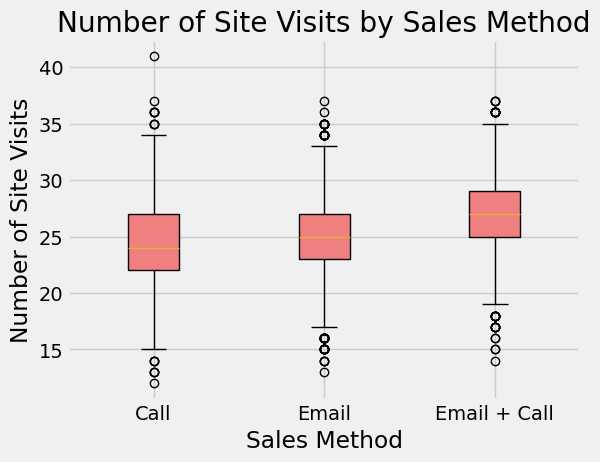

In [99]:
# Plot the number of site visits by sales method using a boxplot
data.boxplot(column='nb_site_visits', by='sales_method', patch_artist=True, 
           boxprops=dict(facecolor='lightcoral', color='black'), 
           whiskerprops=dict(color='black'), capprops=dict(color='black'))

# Add title and labels
plt.title('Number of Site Visits by Sales Method')
plt.suptitle('')  # Removes the default title generated by the boxplot
plt.xlabel('Sales Method')
plt.ylabel('Number of Site Visits')

# Show the plot
plt.show()


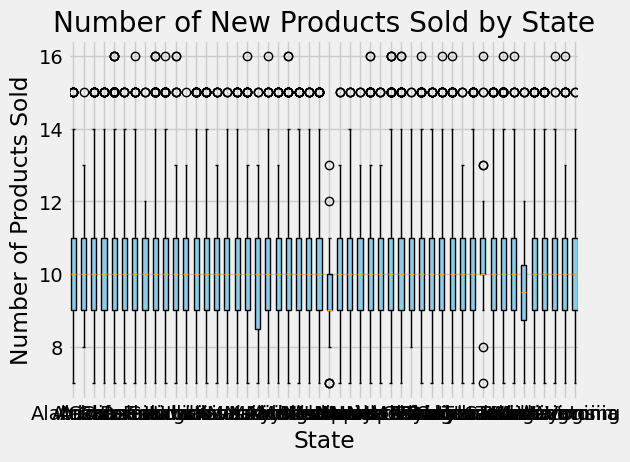

In [101]:
# Plot using a Boxplot to visualize the number of new products sold in various states. 
# Use (column='nb_sold', by='state')

# Plot the number of new products sold by state using a boxplot
data.boxplot(column='nb_sold', by='state', patch_artist=True, 
           boxprops=dict(facecolor='skyblue', color='black'), 
           whiskerprops=dict(color='black'), capprops=dict(color='black'))

# Add title and labels
plt.title('Number of New Products Sold by State')
plt.suptitle('')  # Removes the default title generated by the boxplot
plt.xlabel('State')
plt.ylabel('Number of Products Sold')

# Show the plot
plt.show()


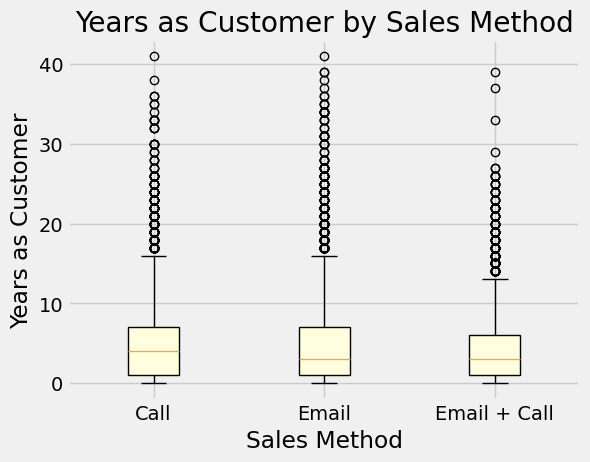

In [103]:
# Boxplot for years_as_customer by sales_method
 
# Plot the years as customer by sales method using a boxplot
data.boxplot(column='years_as_customer', by='sales_method', patch_artist=True, 
           boxprops=dict(facecolor='lightyellow', color='black'), 
           whiskerprops=dict(color='black'), capprops=dict(color='black'))

# Add title and labels
plt.title('Years as Customer by Sales Method')
plt.suptitle('')  # Removes the default title generated by the boxplot
plt.xlabel('Sales Method')
plt.ylabel('Years as Customer')

# Show the plot
plt.show()



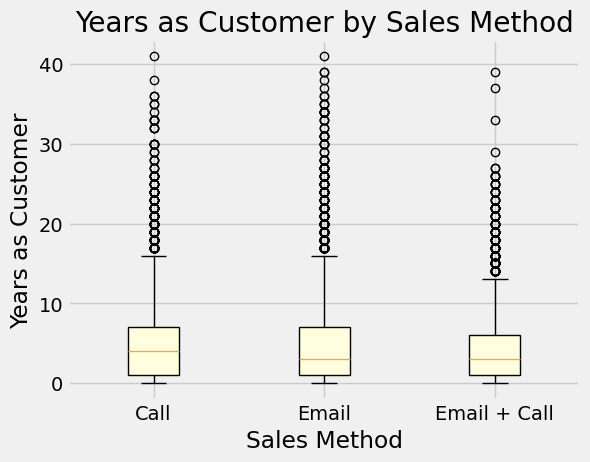

In [107]:
# Boxplot for years_as_customer by sales_method
# Plot the years as customer by sales method using a boxplot
data.boxplot(column='years_as_customer', by='sales_method', patch_artist=True, 
           boxprops=dict(facecolor='lightyellow', color='black'), 
           whiskerprops=dict(color='black'), capprops=dict(color='black'))

# Add title and labels
plt.title('Years as Customer by Sales Method')
plt.suptitle('')  # Removes the default title generated by the boxplot
plt.xlabel('Sales Method')
plt.ylabel('Years as Customer')

# Show the plot
plt.show()

In [111]:
data.columns

Index(['week', 'sales_method', 'customer_id', 'nb_sold', 'revenue',
       'years_as_customer', 'nb_site_visits', 'state'],
      dtype='object')

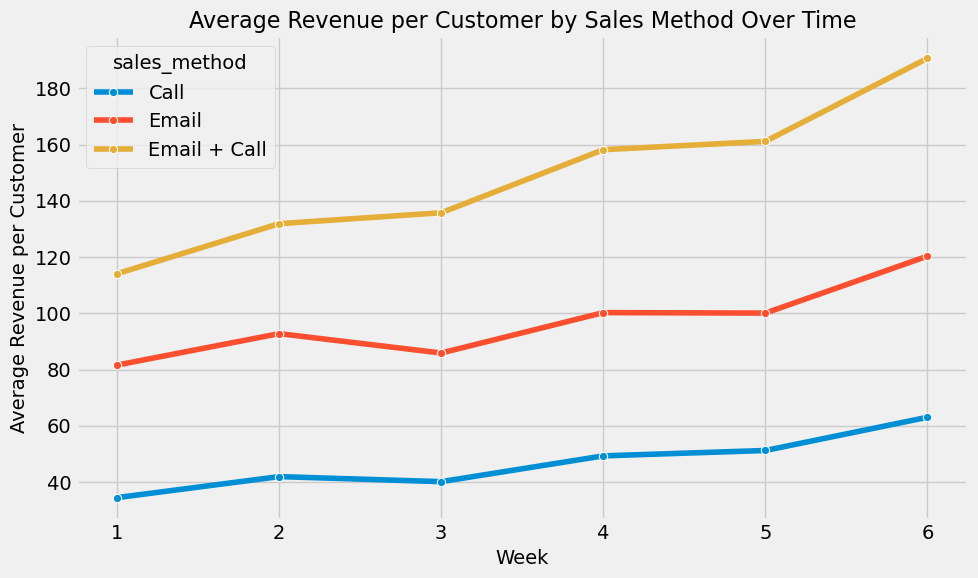

In [127]:
# Determine the Average Revenue per Customer by Sales Method over Time

# Calculate average revenue per customer by sales method over time
# avg_revenue_per_customer = data.groupby(['week', 'sales_method'])['revenue'].sum() / data.groupby(['week', 'sales_method'])['customer_id'].nunique()

# # Reset the index to make the data easier to plot
# avg_revenue_per_customer = avg_revenue_per_customer.reset_index()

# # Plot the average revenue per customer by sales method over time
# for method in avg_revenue_per_customer['sales_method'].unique():
#     method_data = avg_revenue_per_customer[avg_revenue_per_customer['sales_method'] == method]
#     plt.plot(method_data['week'], method_data['revenue'], label=method)

# # Add title, labels, and legend
# plt.title('Average Revenue per Customer by Sales Method Over Time')
# plt.xlabel('Week')
# plt.ylabel('Average Revenue')
# plt.legend(title='Sales Method')

# # Show grid and the plot
# plt.grid(True)
# plt.show()




# Determine the Average Revenue per Customer by Sales Method over Time

# Step 1: Group by 'week' and 'sales_method', then calculate total revenue and number of unique customers
revenue_per_customer = data.groupby(['week', 'sales_method']).agg(
    total_revenue=('revenue', 'sum'),
    unique_customers=('customer_id', 'nunique')
).reset_index()

# Step 2: Calculate Average Revenue per Customer
revenue_per_customer['avg_revenue_per_customer'] = revenue_per_customer['total_revenue'] / revenue_per_customer['unique_customers']

# Step 3: Plot the results over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='week', y='avg_revenue_per_customer', hue='sales_method', data=revenue_per_customer, marker='o')

# Add title and labels
plt.title('Average Revenue per Customer by Sales Method Over Time', fontsize=16)
plt.xlabel('Week', fontsize=14)
plt.ylabel('Average Revenue per Customer', fontsize=14)

# Add gridlines for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
# plt.grid()
# plt.show()

## 4. Defining Business Metrics to Track Performance - Average Revenue per Customer Sales Effort
To get a better understanding of the performance of each sales method let's create a metric called Average Reveue per Customer Sales Effort(ARPSE). This metric takes into account the difficulty of each sales method in terms of time spent with email having a value of 0.5, email + call 1 and call 3.

**ARCPM = (Total Revenue for Method) / (Number of customers * Sales effort)**

In [123]:
# Define the sales effort for each sales method

# Define the sales effort for each sales method
effort_mapping = {
    'Email': 1,  # Low effort
    'Call': 3,   # High effort
    'Email + Call': 2  # Moderate effort
}
# Group the data by sales_method and aggregate the total revenue and number of customers
# Group the data by sales_method and aggregate the total revenue and number of customers
sales_agg =data.groupby('sales_method').agg(
    total_revenue=('revenue', 'sum'),
    total_customers=('customer_id', 'nunique')
)
# Calculate ARCPSE for each sales method
sales_agg['effort'] = sales_agg.index.map(effort_mapping)
sales_agg['ARCPSE'] = sales_agg['total_revenue'] / sales_agg['total_customers'] / sales_agg['effort']
# Display the ARCPSE for each sales method

print(sales_agg[['ARCPSE']])

                 ARCPSE
sales_method           
Call          15.287081
Email         90.050607
Email + Call  79.365608


Your Analysis results!!!!!!!!
The ARCPSE results show that Email has the highest value with 194.25, followed by Email + Call with 183.65 and finally call with 15.86. This suggests that the call method is the most efficient in terms of reveneue generated per unit of effort.

However, it is important to note that additional factors have been observed. The 'Email + Call' method had customers with more website visits and higher average number of items purchased. Moreover, this method demonstrated a steady increase in revenue growth over the six-week period. In contrast, the 'Call' method showed high revenue in week 1 but decreased over time.

## Conclusion and Recommendations
Taking in all factors from the analysis it is recommended to focus on the Email + Call method for the following reasons:

- While 'Email' has the highest ARCPSE, the 'Email + Call' method generates more customer engagement, as evidenced by higher website visits and average items purchased. This could lead to stronger customer relationships and long-term growth.
- The 'Email + Call' method has shown a consistent upward trend in revenue generation over six weeks, indicating its potential for continued success.
- The 'Call' method is the least efficient in terms of effort and revenue generation and has a downward trend in revenue over time.
In conclusion, the 'Email + Call' method should be prioritized for sales efforts, as it demonstrates better customer engagement, consistent revenue growth, and a more sustainable balance between effort and return.